<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/trabalho-UERJ-analise-de-dados/blob/main/experimento_queda_livre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
h =0.9
g = 9.787899
expectedTime = ((2*h)/g)**(1/2)
print(expectedTime)

watchTimes = [
    0.43,0.44,0.35,0.70,0.50,0.58,0.70,0.34,0.32,0.32,0.52,0.82,
    0.63,0.48,0.28,0.48,0.65,0.51,0.65,0.49,0.45,0.34,0.11,0.57,
    0.34,0.39,0.54,0.44,0.41,0.32,0.32,0.54,0.50,0.61,0.57,0.40,
    0.55,0.34,0.45,0.33,0.34,0.58,0.57,0.49,0.47,0.52,0.46,0.48,
    0.49,0.54,0.53,0.50,0.50,0.34,0.42,0.43,0.30,0.38,0.37,0.43   
]

sensorTimes = [
    0.403,0.400,0.398,0.409,0.403,0.393,0.391,0.407,0.394,0.404,
    0.393,0.406,0.343,0.350,0.417,0.406,0.399,0.392,0.399,0.403,0.413,0.419,
    0.400,0.398,0.403,0.411,0.410,0.346,0.416,0.400,0.412,0.410,0.394,
    0.394,0.328,0.350,0.410,0.361,0.394,0.401,0.415,0.427,0.423,0.418,0.419,0.418,0.420,0.425,
    0.421,0.422,0.422,0.442,0.421,0.423,0.423,0.424,0.420,0.423,0.427,0.421]

vez = range(len(sensorTimes))
sensorErrors = []
watchErrors = []
for i in range(60):
  sensorErrors.append(((sensorTimes[i] - expectedTime)**2)**(1/2))
  watchErrors.append(((watchTimes[i] - expectedTime)**2)**(1/2))

0.4288362729936556


In [53]:
df = pd.DataFrame(np.c_[watchTimes,sensorTimes,watchErrors,sensorErrors], columns=['na mão','na maquina', 'erro da mão','erro da maquina'])

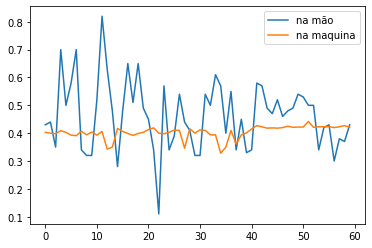

In [54]:
df.drop(columns = ['erro da maquina', 'erro da mão']).plot()

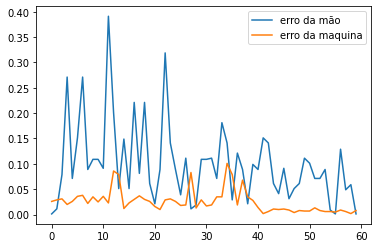

In [55]:
df.drop(columns=['na mão','na maquina']).plot()

In [6]:
def getVariancia(arraio): 
  media = arraio.mean()
  diferencas = list(map(lambda val: (val-media)**2,arraio.values))
  varianca = np.sum(diferencas)/len(arraio)
  return varianca
#print(np.var(df['na mão']))
getVariancia(df['na mão'])

0.014830972222222218

In [7]:
def getDesvioPadrao(arraio):
  variancia = getVariancia(arraio)
  return variancia**(1/2)

#print(np.std(df['na mão']))
getDesvioPadrao(df['na mão'])

0.12178247912660596

In [8]:
for key in df.keys():
  maximo , minimo , media = round(df[key].max(),3) , round(df[key].min(),3) ,  round(df[key].mean(),3)
  abr = round(maximo - minimo,3)
  desvioPd = round(getDesvioPadrao(df[key]),4)
  print(key)
  print(f'maximo {key} : {maximo}')
  print(f'minimo {key} : {minimo}')
  print(f'media {key} : {media}')
  print(f'abrangencia {key} : {abr}')
  print(f'desvio padrão: {desvioPd}\n')

na mão
maximo na mão : 0.82
minimo na mão : 0.11
media na mão : 0.464
abrangencia na mão : 0.71
desvio padrão: 0.1218

na maquina
maximo na maquina : 0.442
minimo na maquina : 0.328
media na maquina : 0.404
abrangencia na maquina : 0.114
desvio padrão: 0.0224

erro
maximo erro : 0.414
minimo erro : 0.003
media erro : 0.111
abrangencia erro : 0.411
desvio padrão: 0.0856



>Seguindo o raciocinio de stuart (n° classes = 1+ 3,3 log10(n)) com n = 60 temos 6,8 como resultado, portanto devemos utilizar 7 classes

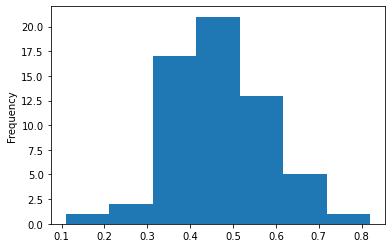

In [9]:
df['na mão'].plot(kind = 'hist', bins = 7)